In [106]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

import warnings
warnings.filterwarnings('ignore')

In [107]:
# Levanto los datos

df = pd.read_csv('../data/GlobalLandTemperaturesByCountry.csv')
df2 = pd.read_csv('../data/worldTemperature.csv')
#df_lat_long = pd.read_csv('./data/long lat/cities_lat_long.csv')

In [108]:
# Gráficos los datos
#ano = df2['ano']
fechas = df2['ano']
temperatura = df2['temp']
#df2 = df.groupby(['Country']).get_group('Argentina')

#df2['year'] = pd.DatetimeIndex(df2['dt']).year

#grouped = df2.groupby(['year']).mean().reset_index()

#ax = sns.tsplot(data=grouped['AverageTemperature'], time=grouped['year'], interpolate=True)
#sns.plt.show()

#ax = sns.tsplot(data=temperatura, time=fechas, interpolate=False)
#sns.plt.show()

#ax = sns.tsplot(data=temperatura, time=fechas, interpolate=True)
#sns.plt.show()

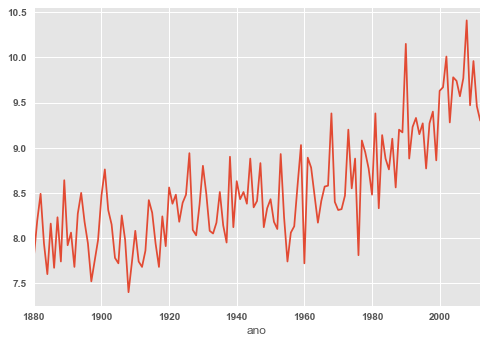

In [109]:
# Limpio los outliers

#fechasSinOutliers = []
#temperaturasSinOutliers = []
#fechasSinOutliers = temperatura[temperatura > 9]

sinOutlier = df2[df2['temp'] > 7]
#print(sinOutlier)
fechasSinOutlier = sinOutlier['ano']
tempSinOutlier = sinOutlier['temp']
#outOutliers = mascara_outlier(df2)
#print(fechasSinOutliers)
#mascara = mascara_outliers(grouped['AverageTemperature'])
#outOutliers = mascara_outliers(temperatura)

#grouped = grouped[mascara]

#sns.tsplot(data=grouped['AverageTemperature'], interpolate=True)

ax = sns.tsplot(data=tempSinOutlier, time=fechasSinOutlier, interpolate=True)
sns.plt.show()

Error de predicción: 2.33


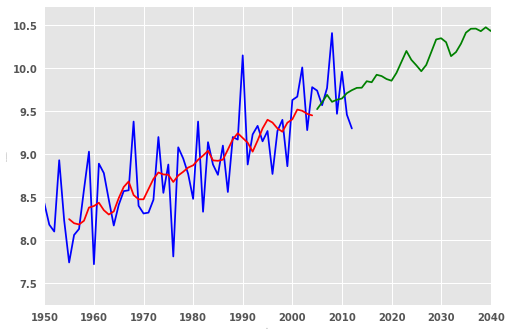

In [116]:
# Uso cuadrados mínimos para predecir
sns.tsplot(data=tempSinOutlier, time=fechasSinOutlier, interpolate=True, color='b')
font = {'family': 'normal', 'weight': 'bold', 'size': 20}

sns.plt.rc('font', **font)

sns.plt.rc('axes', labelsize=1)

def armar_matriz_A(s):
    temp = []
    for t in s:
        #temp.append([t^2, t, 1, np.cos(t)]) #2
        temp.append([np.sin(0.1*t)*np.cos(t), t^5, t^4,  t^2, t, 1]) #4
        #temp.append([np.sin(t)*np.cos(t), t^2, t, 1]) #3
        #temp.append([t^2, t, 1]) #1
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)

    # Entreno el modelo
    #df_e = df[df['year'].isin(rango_entrenamiento)]
    df_e2 = df2[df2['ano'].isin(rango_entrenamiento)]
    #A_e = armar_matriz_A(df_e['year'])
    A_e2 = armar_matriz_A(df_e2['ano'])
    #regr.fit(A_e, df_e['AverageTemperature'])
    regr.fit(A_e2, df_e2['temp'])
    
    # Me fijo la aproximación que se realizó
    #df_e['p'] = regr.predict(A_e)
    df_e2['p'] = regr.predict(A_e2)
    #sns.tsplot(time=df_e['year'], data=df_e['p'], color='r')
    sns.tsplot(time=df_e2['ano'], data=df_e2['p'], color='r')
    # Realizo predicciones
    #df_p = df[df['year'].isin(rango_prediccion)]
    df_p2 = df2[df2['ano'].isin(rango_prediccion)]
    df_p3 = df_p2
    #s2 = pd.Series([(4,2),(4,2),(4,2)])
    #print(rango_prediccion[-1])
    for i in range(df_p2['ano'].iloc[-1]+1, rango_prediccion[-1]):
        #print(i)  
        dfNew = pd.DataFrame({'ano': [i], 'temp': [0]}, index=[i-1880])
        aConcatenar = [df_p2, dfNew]
        df_p2 = pd.concat(aConcatenar)
    #print(df_p2)
    #A_p = armar_matriz_A(df_p['year'])
    A_p2 = armar_matriz_A(df_p2['ano'])
    #print(A_p2)
    #df_p['p'] = regr.predict(A_p)
    df_p2['p'] = regr.predict(A_p2)
    #sns.tsplot(time=df_p['year'], data=df_p['p'], color='g')
    sns.tsplot(time=df_p2['ano'], data=df_p2['p'], color='g')

    #ECM = sum((df_p['p']-df_p['AverageTemperature'])**2)
    ECM = sum((df_p2['p']-df_p2['temp'])**2)
    return ECM

def predecir(k):
    return entrenar_y_predecir_en_rangos(sinOutlier, range(k-50,k), range(k,k+40))

    
ECM1 = predecir(2005)
#ECM2 = predecir(1965)
#ECM3 = predecir(1925)
print("Error de predicción: {:.2f}".format(ECM))
    
sns.plt.ylabel('AVG Temperaturas')
sns.plt.xlabel('Años')
sns.plt.xlim((1950,2040))
sns.plt.show()












# Y si no es una seria de tiempo? 

In [12]:
# Un par de cosas más de pandas

years = [2004]*6 + [2005]*6 + [2006]*6
delays = list(np.random.randn(6)+80) + list(np.random.randn(6)+5) + list(np.random.randn(6)+50)
delays[2] = 5
delays[7] = 80

df1 = pd.DataFrame({
    'year': years,
    'delay': delays
})

df1

,delay,year
0,80.821911,2004
1,81.994264,2004
2,5.000000,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
7,80.000000,2005
8,5.537343,2005
9,5.836535,2005


In [13]:
# Groupby y sacar outliers

mascara = df1.groupby('year')['delay'].apply(mascara_outliers)
df1 = df1[mascara]
df1

,delay,year
0,80.821911,2004
1,81.994264,2004
3,77.742141,2004
4,80.080482,2004
5,80.356484,2004
6,4.082986,2005
8,5.537343,2005
9,5.836535,2005
10,5.402303,2005
11,5.086106,2005


In [14]:
# Groupby y calcular promedio

promedio = df1.groupby('year').aggregate(['mean', 'std', 'count'])
promedio

delay                
           mean       std count
year                           
2004  80.199056  1.556117     5
2005   5.189055  0.674536     5
2006  50.300613  0.755552     6